## Clustering Datasets

Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
from sklearn.mixture import BayesianGaussianMixture
from sklearn.mixture import GaussianMixture

from yellowbrick.cluster import KElbowVisualizer
import scipy.cluster.hierarchy as sch

from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import fowlkes_mallows_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import mutual_info_score
from sklearn.metrics import homogeneity_score
from sklearn.metrics import completeness_score
from sklearn.metrics import v_measure_score

Creating function to draw elbow curves and dendrograms

In [2]:
# Function to create elbow curves and dendrograms

def elbow_curve_and_dendrogram(dataset, N_cluster, batch_size, dendro_cluster):
    fig = plt.figure(figsize=(20,6))
    
    plt.subplot(1, 2, 1)
    model = MiniBatchKMeans(n_clusters=N_cluster, random_state=0, batch_size=batch_size)
    visualizer = KElbowVisualizer(model, k=(4,12)).fit(dataset)
    global elbow_best_value
    elbow_best_value = visualizer.elbow_value_
    print('For MiniBatchKMeans, the ideal number of clusters are ', elbow_best_value)
    
    plt.subplot(1, 2, 2)
    dendrogram = sch.dendrogram(sch.linkage(dataset, method='complete'))
    print('Based on dendrogram, the ideal number of clusters are ', dendro_cluster)

    plt.tight_layout()

Creating functions to obtain intrinsic and extrinsic measures for all clustering algorithms

In [14]:
# Function for all clustering algorithms other than GMM and Bayesian GMM

def evaluation_matrix(dataset, elbow_best_value, dendogram_best_number, batch_size, ep_s, min_sample, spectral_clusters, label_assign, damping_value, max_iteration, affinity_type):

    # Output list to append all metric scores
    output_list = []

    # Dictionary of clustering algorithms   
    evaluation_matrix_models = {
        
        'MiniBatchKMeans': [MiniBatchKMeans(n_clusters=elbow_best_value, random_state=0, batch_size=batch_size).fit(dataset)],

        'AgglomerativeClustering': [AgglomerativeClustering(n_clusters=dendogram_best_number).fit(dataset)],

        'DBSCAN': [DBSCAN(eps=ep_s, min_samples=min_sample).fit(dataset)],

        'OPTICS': [OPTICS(eps=ep_s).fit(dataset)],
        
        'Spectral Clustering': [SpectralClustering(n_clusters=spectral_clusters, assign_labels=label_assign, random_state=0).fit(dataset)],
        
        'Affinity Propagation': [AffinityPropagation(damping=damping_value, max_iter=max_iteration, affinity=affinity_type, random_state=0).fit(dataset)]
    }
    
    # Calculating all the metric scores and appending in the output list
    for each in evaluation_matrix_models.keys():
        output_list.append([
            silhouette_score(dataset, evaluation_matrix_models[each][0].labels_, metric='euclidean'),
            davies_bouldin_score(dataset, evaluation_matrix_models[each][0].labels_)])

    # Dataframe of scores for each dataset
    evaluation_matrix_df = pd.DataFrame(output_list, columns=['silhouette_score','davies_bouldin_score'])
    
    evaluation_matrix_df.set_index([list(evaluation_matrix_models.keys())], drop=True, inplace=True)

    return evaluation_matrix_df



# Function for GMM and Bayesian GMM

def bayesian_and_gaussian(dataset, components, type_covariance, covariance_reg):

    # Output list to append all metric scores
    output_list = []

    # Dictionary of GMM and Bayesian GMM algorithms 
    bayesian_and_gaussian_mixture = {
        
        'Bayesian Gaussian Mixture': [BayesianGaussianMixture(n_components=components, covariance_type=type_covariance, reg_covar=covariance_reg, random_state=0).fit(dataset).fit_predict(dataset)],
        
        'Gaussian Mixture': [GaussianMixture(n_components=components, covariance_type=type_covariance, reg_covar=covariance_reg, random_state=0).fit(dataset).fit_predict(dataset)]}

    # Calculating all the metric scores and appending in the output list
    for each in bayesian_and_gaussian_mixture.keys():
        output_list.append([
            silhouette_score(dataset, bayesian_and_gaussian_mixture[each][0], metric='euclidean'),
            davies_bouldin_score(dataset, bayesian_and_gaussian_mixture[each][0])])

    # Dataframe of scores for each dataset
    bayesian_gaussian_matrix_df = pd.DataFrame(output_list, columns=['silhouette_score','davies_bouldin_score'])
            
    bayesian_gaussian_matrix_df.set_index([list(bayesian_and_gaussian_mixture.keys())], drop=True, inplace=True)

    return bayesian_gaussian_matrix_df

## Dataset 01: Wholesale Customers Data

The data set refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories. It contains 440 rows and 8 columns.

In [226]:
# Loading the dataset

df = pd.read_csv('Clustering\Wholesale customers data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [227]:
# Data shape

df.shape

(440, 8)

In [228]:
# Checking null values

df.isna().sum().sum()

0

In [229]:
# Normalizing the data 

ss=StandardScaler()
for i in df.columns:
    df[i] = ss.fit_transform(df[[i]])

For MiniBatchKMeans, the ideal number of clusters are  8
Based on dendrogram, the ideal number of clusters are  2


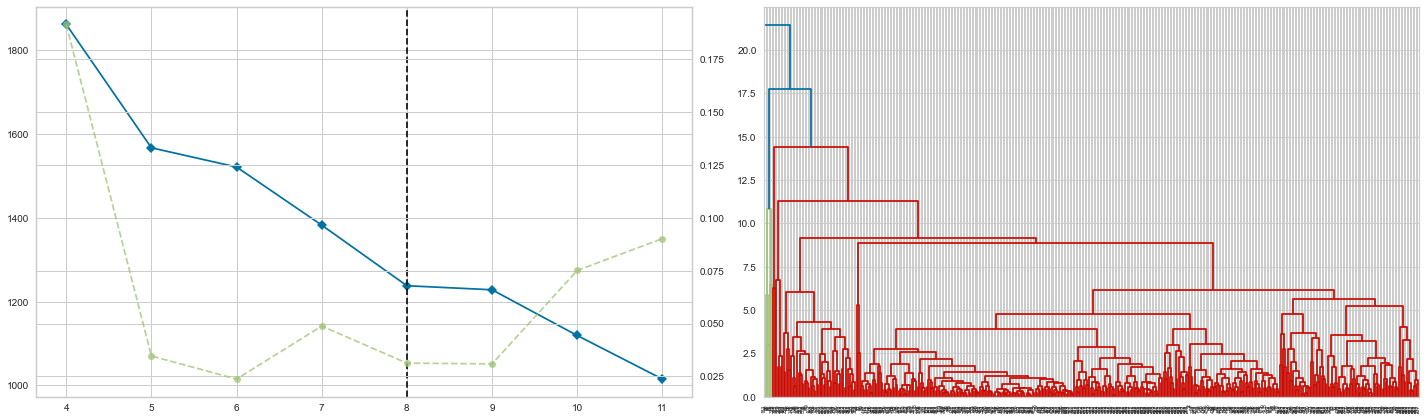

In [222]:
# Calling function to create elbow curve and dendrogram

elbow_curve_and_dendrogram(df, 8, 50, 2)

In [223]:
# Calling function to create a dataframe of metric scores for six clustering algorithms

evaluation_matrix(df, elbow_best_value, 2, 50, 3, 5, 2, 'discretize', 0.8, 500, 'euclidean')

,silhouette_score,davies_bouldin_score
MiniBatchKMeans,0.272395,1.231588
AgglomerativeClustering,0.368021,1.284974
DBSCAN,0.686648,1.455229
OPTICS,-0.371527,1.383570
Spectral Clustering,0.702650,0.543032
Affinity Propagation,0.265573,0.847532


In [224]:
# Calling function to create a dataframe of metric scores for GMM and Bayesian GMM

bayesian_and_gaussian(df, 2, 'full', 1e-6)

,silhouette_score,davies_bouldin_score
Bayesian Gaussian Mixture,0.182912,2.432122
Gaussian Mixture,0.225332,2.091089


#### Compare the performances of all clustering algorithms with Gaussian Mixture Model (GMM)

## Hyperparameter Selection

### Mini Batch KMeans

In [230]:
# Checking best combination of hyperparameters

best_combination = [[5,50],[6,25],[7,50],[8,15],[9,75]]

mean_score_list = []

for i in best_combination:
    model = MiniBatchKMeans(n_clusters=i[0], random_state=0, batch_size=i[1])
    model.fit(df)
    
    # Calculating intrinsic measures for each combination of hyperparameters
    
    silhouette = silhouette_score(df, model.labels_, metric='euclidean')
    davies_bouldin = davies_bouldin_score(df, model.labels_)
    
    # Evaluating means of respective scores for each combination

    scores = [silhouette + davies_bouldin]
    mean_scores = sum(scores)/len(scores)
    print('Average of all scores for ' + str(i) + ' combination is ' + str(mean_scores))
    mean_score_list.append(mean_scores)

Average of all scores for [5, 50] combination is 1.4767086508961498
Average of all scores for [6, 25] combination is 1.5131194821843756
Average of all scores for [7, 50] combination is 1.559238467666191
Average of all scores for [8, 15] combination is 1.539731884165035
Average of all scores for [9, 75] combination is 1.5177391409525076


The best combination of hyperparameters in Mini Batch KMeans which gave the highest average metric score includes:

number of clusters = 7, batch size = 50 

#### Plotting each combination's performance

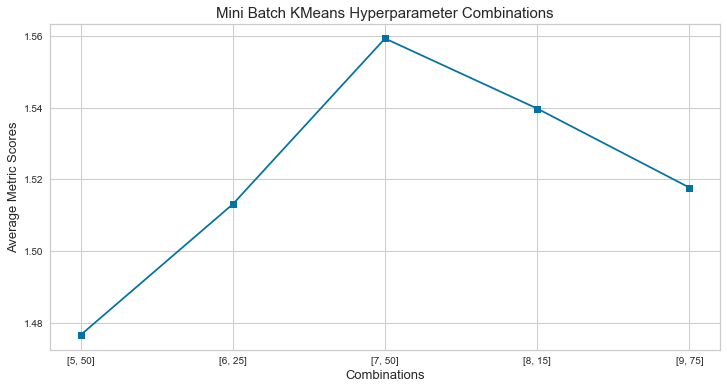

In [231]:
list_of_combinations = [best_combination[0], best_combination[1], best_combination[2], best_combination[3], best_combination[4]]
plt.figure(figsize = (12,6))
plt.plot(mean_score_list, marker = 's', label = [list_of_combinations])
plt.xlabel('Combinations', fontsize=13)
plt.ylabel('Average Metric Scores', fontsize=13)
plt.title('Mini Batch KMeans Hyperparameter Combinations', fontsize=15)
plt.xticks([0,1,2,3,4], list_of_combinations)
plt.show()

### Agglomerative Clustering

In [19]:
# Checking best value of cluster

best_combination = [2,3,4,5,6,7,8]

for i in best_combination:
    model = AgglomerativeClustering(n_clusters=i)
    model.fit(df)
    
    # Calculating intrinsic measures for each cluster value

    silhouette = silhouette_score(df, model.labels_, metric='euclidean')
    davies_bouldin = davies_bouldin_score(df, model.labels_)
    
    # Evaluating means of respective scores for each cluster
    
    scores = [silhouette + davies_bouldin]
    mean_scores = sum(scores)/len(scores)
    print('Average of all scores for ' + str(i) + ' clusters is ' + str(mean_scores))

Average of all scores for 2 clusters is 1.6529945038614924
Average of all scores for 3 clusters is 1.5151217915924142
Average of all scores for 4 clusters is 1.1877708035767487
Average of all scores for 5 clusters is 1.2137662492892645
Average of all scores for 6 clusters is 1.2992103505575379
Average of all scores for 7 clusters is 1.4065538473221895
Average of all scores for 8 clusters is 1.3241078548614331


The best value of number of clusters in Agglomerative Clustering is 2, which gave the highest average metric score.

### DBScan

In [24]:
# Checking best combination of hyperparameters

best_combination = [[0.7,1],[1,2],[3,3],[3,5],[5,7]]

for i in best_combination:
    model = DBSCAN(eps=i[0], min_samples=i[1])
    model.fit(df)
    
    # Calculating intrinsic measures for each combination of hyperparameters

    silhouette = silhouette_score(df, model.labels_, metric='euclidean')
    davies_bouldin = davies_bouldin_score(df, model.labels_)

    # Evaluating means of respective scores for each combination
    
    scores = [silhouette + davies_bouldin]
    mean_scores = sum(scores)/len(scores)
    print('Average of all scores for ' + str(i) + ' combination is ' + str(mean_scores))

Average of all scores for [0.7, 1] combination is 0.4113956613668611
Average of all scores for [1, 2] combination is 1.7863514032853711
Average of all scores for [3, 3] combination is 2.141876937762832
Average of all scores for [3, 5] combination is 2.141876937762832
Average of all scores for [5, 7] combination is 1.9397859919971923


The best combinations of hyperparameters in DBScan were two, which gave the highest average metric score includes:

(maximum distance between two samples, minimum number of samples)  = (3,3) and (3,5) 

### OPTICS

In [25]:
# Checking best value of minimum number of samples

best_combination = [3,4,5,6,7,8]

for i in best_combination:
    model = OPTICS(min_samples=i)
    model.fit(df)
    
    # Calculating intrinsic measures for each value of minimum samples
    
    silhouette = silhouette_score(df, model.labels_, metric='euclidean')
    davies_bouldin = davies_bouldin_score(df, model.labels_)
    
    # Evaluating means of respective scores for each value of minimum samples

    scores = [silhouette + davies_bouldin]
    mean_scores = sum(scores)/len(scores)
    print('Average of all scores for ' + str(i) + ' samples is ' + str(mean_scores))

Average of all scores for 3 samples is 1.1680984842696243
Average of all scores for 4 samples is 1.1256880942644034
Average of all scores for 5 samples is 1.0120426948827292
Average of all scores for 6 samples is 1.4577796218285197
Average of all scores for 7 samples is 1.4086355159351056
Average of all scores for 8 samples is 1.3629972392002907


The best value of minimum number of samples in OPTICS is 6, which gave the highest average metric score.

### Affinity Propagation

In [26]:
# Checking best combination of hyperparameters

best_combination = [[0.5,200],[0.6,300],[0.7,400],[0.8,200],[0.9,500]]

for i in best_combination:
    model = AffinityPropagation(damping=i[0], max_iter=i[1], affinity="euclidean", random_state=0)
    model.fit(df)
    
    # Calculating intrinsic measures for each combination of hyperparameters
    
    silhouette = silhouette_score(df, model.labels_, metric='euclidean')
    davies_bouldin = davies_bouldin_score(df, model.labels_)
    
    # Evaluating means of respective scores for each combination
    
    scores = [silhouette + davies_bouldin]
    mean_scores = sum(scores)/len(scores)
    print('Average of all scores for ' + str(i) + ' combination is ' + str(mean_scores))

Average of all scores for [0.5, 200] combination is 1.1386009440266007
Average of all scores for [0.6, 300] combination is 1.1096541832185056
Average of all scores for [0.7, 400] combination is 1.127578218169742
Average of all scores for [0.8, 200] combination is 1.1131048431911226
Average of all scores for [0.9, 500] combination is 1.1226637278653113


The best combinations of hyperparameters in Affinity Propagation which gave the highest average metric scores:

damping value = 0.5, maximum iterations = 200

### Spectral Clustering

In [235]:
# Checking best combination of hyperparameters

best_combination = [[5,'discretize'],[6,'discretize'],[7,'kmeans'],[8,'kmeans'],[9,'discretize']]

mean_score_list = []

for i in best_combination:
    model = SpectralClustering(n_clusters=i[0], assign_labels=i[1], random_state=0)
    model.fit(df)
    
    # Calculating intrinsic measures for each combination of hyperparameters

    silhouette = silhouette_score(df, model.labels_, metric='euclidean')
    davies_bouldin = davies_bouldin_score(df, model.labels_)
    
    # Evaluating means of respective scores for each combination
    
    scores = [silhouette + davies_bouldin]
    mean_scores = sum(scores)/len(scores)
    print('Average of all scores for ' + str(i) + ' combination is ' + str(mean_scores))
    mean_score_list.append(mean_scores)

Average of all scores for [5, 'discretize'] combination is 1.7539667743074623
Average of all scores for [6, 'discretize'] combination is 1.5368673937222774
Average of all scores for [7, 'kmeans'] combination is 0.9480364052366916
Average of all scores for [8, 'kmeans'] combination is 0.9480364052366916
Average of all scores for [9, 'discretize'] combination is 1.7581207515077708


The best combination of hyperparameters in Spectral Clustering that gave the highest average metric score includes:

number of clusters = 9, assign labels = 'discretize'

#### Plotting each combination's performance

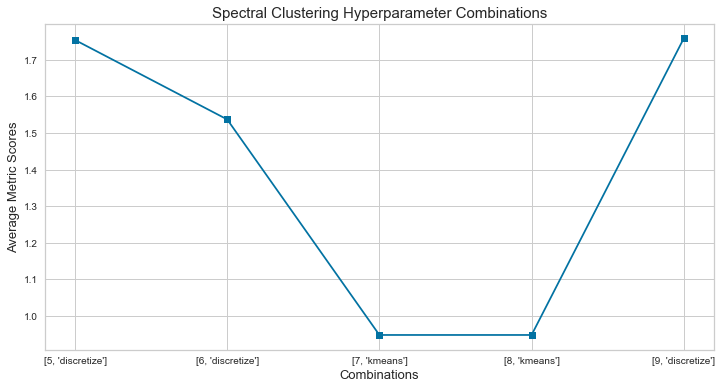

In [236]:
list_of_combinations = [best_combination[0], best_combination[1], best_combination[2], best_combination[3], best_combination[4]]
plt.figure(figsize = (12,6))
plt.plot(mean_score_list, marker = 's', label = [list_of_combinations])
plt.xlabel('Combinations', fontsize=13)
plt.ylabel('Average Metric Scores', fontsize=13)
plt.title('Spectral Clustering Hyperparameter Combinations', fontsize=15)
plt.xticks([0,1,2,3,4], list_of_combinations)
plt.show()

### Bayesian Gaussian Mixture

In [29]:
# Checking best combination of hyperparameters

best_combination = [[2,'full'],[3,'tied'],[4,'diag'],[5,'spherical'],[6,'full'],[7, 'spherical'],[8, 'diag']]

for i in best_combination:
    model = BayesianGaussianMixture(n_components=i[0], covariance_type=i[1], random_state=0)
    labels = model.fit(df).fit_predict(df)
    
    # Calculating intrinsic measures for each combination of hyperparameters
    
    silhouette = silhouette_score(df, labels, metric='euclidean')
    davies_bouldin = davies_bouldin_score(df, labels)
    
    # Evaluating means of respective scores for each combination

    scores = [silhouette + davies_bouldin]
    mean_scores = sum(scores)/len(scores)
    print('Average of all scores for ' + str(i) + ' combination is ' + str(mean_scores))

Average of all scores for [2, 'full'] combination is 2.615033861291491
Average of all scores for [3, 'tied'] combination is 1.5691363999920571
Average of all scores for [4, 'diag'] combination is 2.064076775243002
Average of all scores for [5, 'spherical'] combination is 1.7742804218686299
Average of all scores for [6, 'full'] combination is 1.5901095058480557
Average of all scores for [7, 'spherical'] combination is 2.125979438704685
Average of all scores for [8, 'diag'] combination is 1.6429932545009702


The best combination of hyperparameters in Bayesian Gaussian Mixture that gave the highest average metric score includes:

number of components = 2, covariance type = 'full'

### Gaussian Mixture Model

In [237]:
# Checking best combination of hyperparameters

best_combination = [[2,'full'],[3,'tied'],[4,'diag'],[5,'spherical'],[6,'full'],[7, 'spherical'],[8, 'diag']]

mean_score_list = []

for i in best_combination:
    model = GaussianMixture(n_components=i[0], covariance_type=i[1], random_state=0)
    labels = model.fit(df).fit_predict(df)
    
    # Calculating intrinsic measures for each combination of hyperparameters
    
    silhouette = silhouette_score(df, labels, metric='euclidean')
    davies_bouldin = davies_bouldin_score(df, labels)
    
    # Evaluating means of respective scores for each combination

    scores = [silhouette + davies_bouldin]
    mean_scores = sum(scores)/len(scores)
    print('Average of all scores for ' + str(i) + ' combination is ' + str(mean_scores))
    mean_score_list.append(mean_scores)

Average of all scores for [2, 'full'] combination is 2.316420667405172
Average of all scores for [3, 'tied'] combination is 1.5691363999920571
Average of all scores for [4, 'diag'] combination is 1.7996635722948828
Average of all scores for [5, 'spherical'] combination is 1.8510811408565093
Average of all scores for [6, 'full'] combination is 1.5123473702732848
Average of all scores for [7, 'spherical'] combination is 1.7068611589193632
Average of all scores for [8, 'diag'] combination is 1.8198539098234559


The best combination of hyperparameters in Gaussian Mixture Model that gave the highest average metric score includes:

number of components = 2, covariance type = 'full'

#### Plotting each combination's performance

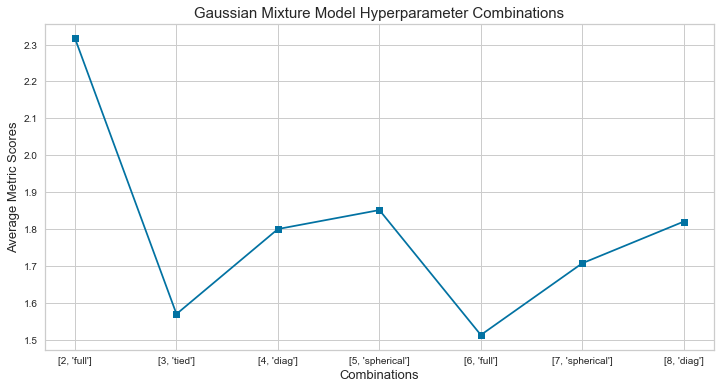

In [238]:
list_of_combinations = [best_combination[0], best_combination[1], best_combination[2], best_combination[3], best_combination[4],
                       best_combination[5], best_combination[6]]
plt.figure(figsize = (12,6))
plt.plot(mean_score_list, marker = 's', label = [list_of_combinations])
plt.xlabel('Combinations', fontsize=13)
plt.ylabel('Average Metric Scores', fontsize=13)
plt.title('Gaussian Mixture Model Hyperparameter Combinations', fontsize=15)
plt.xticks([0,1,2,3,4,5,6], list_of_combinations)
plt.show()

#### Analysis:

1) It is observed that the GMM outperforms Mini Batch KMeans with highest average score, which shows that the GMM is better at modeling the data according to the chosen performance metrics. This could be because the GMM is more flexible and able to capture more complex patterns in the data.

2) It is observed that the GMM outperforms Agglomerative Clustering with highest average score, it suggests that the GMM is able to more accurately and effectively cluster the data into distinct groups. This may be due to the fact that the GMM is able to account for the uncertainty in the data, whereas the Agglomerative clustering approach may be more rigid in its grouping of the data.

3) It is observed that the GMM outperforms DBScan with highest average score, which shows that that the GMM is better at clustering the data and correctly identifying the underlying structure of the data. This could be due to the fact that the GMM uses probabilistic clustering, which allows it to account for uncertainty and potential overlap between clusters. In contrast, the DBScan model uses a density-based approach and may be more sensitive to noise or outliers in the data. 

4) It is observed that the GMM outperforms OPTICS with highest average score, which shows that GMM is more effective at accurately clustering the data. This could be due to the GMM's ability to handle multimodal data and its flexibility in modeling the underlying distribution of the data.

5) It is observed that the GMM outperforms Affinity Propagation with highest average score, which shows that the GMM is a better fit for the data and is able to more accurately predict or classify the data. This could be due to the GMM's ability to model data using a continuous distribution, as opposed to the discrete clustering method used by Affinity propagation.

6) It is observed that the GMM outperforms Spectral Clustering with highest average score, which shows that the GMM is a better fit for the given data and produces more accurate or effective clustering results. This may be due to the GMM's ability to handle mixed data types and account for uncertainty in the data, or because it is more robust to noise or outliers in the data.

7) It is observed that the Bayesian GMM outperforms GMM with highest average score, which shows that the Bayesian version may be slightly more effective in accurately identifying patterns and classifying data points within the dataset. This could be due to the Bayesian model's ability to incorporate prior knowledge and incorporate uncertainties in its predictions, which may lead to more accurate and robust results.

#### Experiment with different values of all possible hyperparameters of GMM

### Parameter changes:

#### (1) Based on number of components

In [31]:
# Changing number of components to obtain the best value

number_of_components = [2,3,4,5,6,7]

for i in number_of_components:
    model = GaussianMixture(n_components=i, covariance_type='full', reg_covar=1e-6, random_state=0)
    labels = model.fit(df).fit_predict(df)
    
    # Calculating intrinsic measures for each value of number of components
    
    silhouette = silhouette_score(df, labels, metric='euclidean')
    davies_bouldin = davies_bouldin_score(df, labels)
    
    # Evaluating means of respective scores for each value of number of components

    scores = [silhouette + davies_bouldin]
    mean_scores = sum(scores)/len(scores)
    print('Average of all scores for ' + str(i) + ' components is ' + str(mean_scores))

Average of all scores for 2 components is 2.316420667405172
Average of all scores for 3 components is 2.2384656808692758
Average of all scores for 4 components is 1.5846172497262259
Average of all scores for 5 components is 1.4649477680086653
Average of all scores for 6 components is 1.5123473702732848
Average of all scores for 7 components is 1.5799037831507277


Upon increasing and decreasing the number of components parameter in GMM, it is observed that the best score is obtained when the number of components are 2. This shows that the model is able to accurately classify the data using fewer components or clusters. This may indicate that the  model is able to effectively capture the underlying structure of the data using fewer components.

#### (2) Based on covariance type

In [33]:
# Changing covariance type to obtain the best value

type_of_covariance = ['full', 'tied', 'diag', 'spherical']

for i in type_of_covariance:
    model = GaussianMixture(n_components=2, covariance_type=i, reg_covar=1e-6, random_state=0)
    labels = model.fit(df).fit_predict(df)
    
    # Calculating intrinsic measures for each covariance type
    
    silhouette = silhouette_score(df, labels, metric='euclidean')
    davies_bouldin = davies_bouldin_score(df, labels)
    
    # Evaluating means of respective scores for each covariance type

    scores = [silhouette + davies_bouldin]
    mean_scores = sum(scores)/len(scores)
    print('Average of all scores for ' + str(i) + ' covariance type is ' + str(mean_scores))

Average of all scores for full covariance type is 2.316420667405172
Average of all scores for tied covariance type is 2.067201031785499
Average of all scores for diag covariance type is 2.2623160484819302
Average of all scores for spherical covariance type is 1.5362448121540833


Upon changing the type of covariance parameter in GMM, it is observed that the best score is obtained when the covariance type is 'full'. This suggests that 'full' covariance parameter allows the model to fit more complex and flexible distributions, allowing it to better represent the data. This can result in improved accuracy and predictive performance for the model.

#### (3) Based on regularization of covariance

In [36]:
# Changing the value of regularized covariance to obtain the best value

regularization_covariance = [1e-20, 1e-10, 1e-6, 0.5, 1.5, 3]

for i in regularization_covariance:
    model = GaussianMixture(n_components=2, covariance_type='full', reg_covar=i, random_state=0)
    labels = model.fit(df).fit_predict(df)
    
    # Calculating intrinsic measures for each value of regularized covariance
    
    silhouette = silhouette_score(df, labels, metric='euclidean')
    davies_bouldin = davies_bouldin_score(df, labels)
    
    # Evaluating means of respective scores for each value of regularized covariance

    scores = [silhouette + davies_bouldin]
    mean_scores = sum(scores)/len(scores)
    print('Average of all scores for ' + 'regularized covariance of ' + str(i) + ' is ' + str(mean_scores))

Average of all scores for regularized covariance of 1e-20 is 2.2623160484819302
Average of all scores for regularized covariance of 1e-10 is 2.2840038124539155
Average of all scores for regularized covariance of 1e-06 is 2.316420667405172
Average of all scores for regularized covariance of 0.5 is 1.8516052724549132
Average of all scores for regularized covariance of 1.5 is 1.8069439815937063
Average of all scores for regularized covariance of 3 is 1.9572485982345


Upon increasing and decreasing the regularized covariance in GMM, it is observed that the best score is obtained when the value is 1e-6. This suggests that the model is performing better when the regularization of the covariance matrices is set to a small value. This could indicate that the model is able to better fit the data when the regularization is set to a lower value, possibly because it is able to more accurately capture the underlying relationships in the data.

## Dataset 02: Stone flakes data

Stone flakes are waste products of the stone tool production in the prehistoric era. The data set concerns the earliest history of mankind. Prehistoric men created the desired shape of a stone tool by striking on a raw stone, thus splitting off flakes, the waste products of the crafting process. Its rows do not stand for single flakes but for whole inventories of them. The given features are relative frequencies of binary, and mean values of numerical characteristics taken over all pieces found in the inventory. It contains 79 rows and 9 columns.

In [38]:
# Saving the dataset as csv

df2 = pd.read_csv('StoneFlakes.dat')
df2.to_csv('StoneFlakes.csv', sep = ',', index=True)

In [39]:
# Loading the dataset

df2 = pd.read_csv('StoneFlakes.csv')
df2.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,ID LBI RTI WDI FLA PSF FSF ZDF1 PROZD
0,ar ?,35.3,2.60,?,42.4,24.2,47.1,69
1,arn 1.23,27.0,3.59,122,0.0,40.0,40.0,30
2,be 1.24,26.5,2.90,121,16.0,20.7,29.7,72
3,bi1 1.07,29.1,3.10,114,44.0,2.6,26.3,68
4,bi2 1.08,43.7,2.40,105,32.6,5.8,10.7,42


In [40]:
# Assigning column names

colnames = ['ID', 'RTI', 'WDI', 'FLA', 'PSF', 'FSF', 'ZDF1', 'PROZD']
df2.columns = colnames
df2.head()

,ID,RTI,WDI,FLA,PSF,FSF,ZDF1,PROZD
0,ar ?,35.3,2.60,?,42.4,24.2,47.1,69
1,arn 1.23,27.0,3.59,122,0.0,40.0,40.0,30
2,be 1.24,26.5,2.90,121,16.0,20.7,29.7,72
3,bi1 1.07,29.1,3.10,114,44.0,2.6,26.3,68
4,bi2 1.08,43.7,2.40,105,32.6,5.8,10.7,42


In [41]:
# Splitting the first column into two columns

df2[['ID', 'LBI']]= df2['ID'].str.split(" ", n = 1, expand = True)
df2 = df2[["ID", "LBI", "RTI", "WDI", "FLA", "PSF", "FSF", "ZDF1", "PROZD"]]
df2.head()

,ID,LBI,RTI,WDI,FLA,PSF,FSF,ZDF1,PROZD
0,ar,?,35.3,2.60,?,42.4,24.2,47.1,69
1,arn,1.23,27.0,3.59,122,0.0,40.0,40.0,30
2,be,1.24,26.5,2.90,121,16.0,20.7,29.7,72
3,bi1,1.07,29.1,3.10,114,44.0,2.6,26.3,68
4,bi2,1.08,43.7,2.40,105,32.6,5.8,10.7,42


In [42]:
# Data shape

df2.shape

(79, 9)

In [43]:
# Checking null values

df2.isna().sum().sum()

0

In [50]:
# Converting string columns to float

df2['LBI'] = pd.to_numeric(df2['LBI'], errors='coerce').astype('float64')
df2['FLA'] = pd.to_numeric(df2['FLA'], errors='coerce').astype('float64')
df2['PSF'] = pd.to_numeric(df2['PSF'], errors='coerce').astype('float64')
df2['FSF'] = pd.to_numeric(df2['FSF'], errors='coerce').astype('float64')
df2['ZDF1'] = pd.to_numeric(df2['ZDF1'], errors='coerce').astype('float64')

In [52]:
# Converting string columns to integer

for i in df2.select_dtypes(include=[object]).columns:
    df2[i] = pd.factorize(df2[i])[0] + 1

In [57]:
# Dropping null values

df2 = df2.dropna()

In [59]:
# Normalizing the data 

ss=StandardScaler()
for i in df2.columns:
    df2[i] = ss.fit_transform(df2[[i]])

For MiniBatchKMeans, the ideal number of clusters are  4
Based on dendrogram, the ideal number of clusters are  3


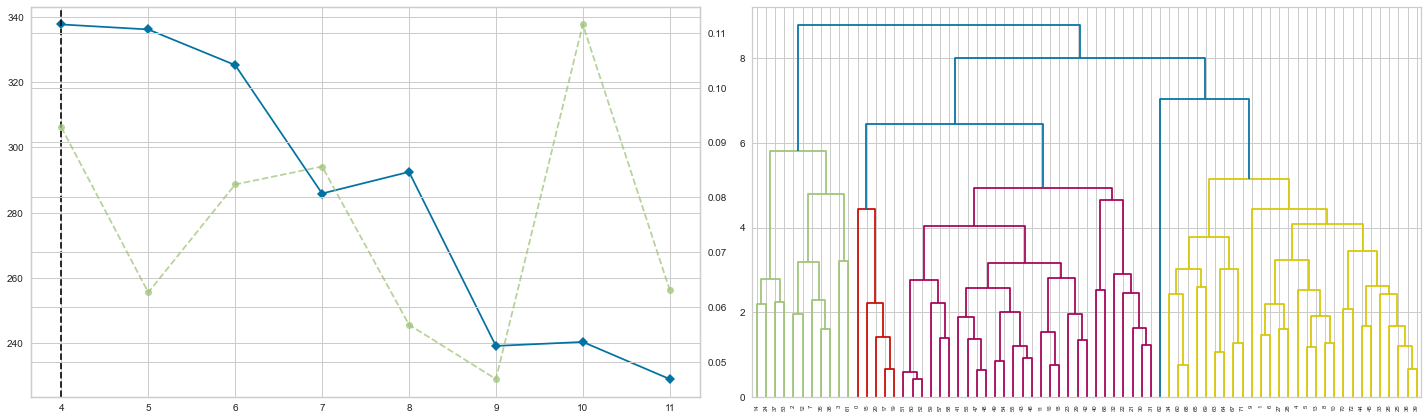

In [63]:
# Calling function to create elbow curve and dendrogram

elbow_curve_and_dendrogram(df2, 4, 5, 3)

In [64]:
# Calling function to create a dataframe of metric scores for six clustering algorithms

evaluation_matrix(df2, elbow_best_value, 3, 5, 3, 5, 2, 'discretize', 0.8, 500, 'euclidean')

,silhouette_score,davies_bouldin_score
MiniBatchKMeans,0.233629,1.469048
AgglomerativeClustering,0.196949,1.767869
DBSCAN,0.294069,3.042464
OPTICS,-0.083609,1.967784
Spectral Clustering,0.289420,1.293410
Affinity Propagation,0.208006,1.231518


In [65]:
# Calling function to create a dataframe of metric scores for GMM and Bayesian GMM

bayesian_and_gaussian(df2, 2, 'full', 1e-6)

,silhouette_score,davies_bouldin_score
Bayesian Gaussian Mixture,0.283628,1.332327
Gaussian Mixture,0.283628,1.332327


## Hyperparameter Selection

### Mini Batch KMeans

In [66]:
# Checking best combination of hyperparameters

best_combination = [[4,5],[5,10],[6,5],[7,15],[8,10]]

for i in best_combination:
    model = MiniBatchKMeans(n_clusters=i[0], random_state=0, batch_size=i[1])
    model.fit(df2)
    
    # Calculating intrinsic measures for each combination of hyperparameters

    silhouette = silhouette_score(df2, model.labels_, metric='euclidean')
    davies_bouldin = davies_bouldin_score(df2, model.labels_)
    
    # Evaluating means of respective scores for each combination
    
    scores = [silhouette + davies_bouldin]
    mean_scores = sum(scores)/len(scores)
    print('Average of all scores for ' + str(i) + ' combination is ' + str(mean_scores))

Average of all scores for [4, 5] combination is 1.7026770310949544
Average of all scores for [5, 10] combination is 1.5831584859940286
Average of all scores for [6, 5] combination is 1.6092323730565332
Average of all scores for [7, 15] combination is 1.50638824224166
Average of all scores for [8, 10] combination is 1.5429159317817382


The best combination of hyperparameters in Mini Batch KMeans which gave the highest average metric score includes:

number of clusters = 4, batch size = 5 

### Agglomerative Clustering

In [67]:
# Checking best value of cluster

best_combination = [2,3,4,5,6,7,8]

for i in best_combination:
    model = AgglomerativeClustering(n_clusters=i)
    model.fit(df2)
    
    # Calculating intrinsic measures for each cluster value
    
    silhouette = silhouette_score(df2, model.labels_, metric='euclidean')
    davies_bouldin = davies_bouldin_score(df2, model.labels_)
    
    # Evaluating means of respective scores for each cluster

    scores = [silhouette + davies_bouldin]
    mean_scores = sum(scores)/len(scores)
    print('Average of all scores for ' + str(i) + ' clusters is ' + str(mean_scores))

Average of all scores for 2 clusters is 1.6093200413938273
Average of all scores for 3 clusters is 1.9648176067351053
Average of all scores for 4 clusters is 1.8586048819633494
Average of all scores for 5 clusters is 1.733410881797486
Average of all scores for 6 clusters is 1.551292552646163
Average of all scores for 7 clusters is 1.4384060741320408
Average of all scores for 8 clusters is 1.553599016840034


The best value of number of clusters in Agglomerative Clustering is 3, which gave the highest average metric score.

### DBScan

In [73]:
# Checking best combination of hyperparameters

best_combination = [[0.7,1],[1,2],[2,4],[3,5],[3,7]]

for i in best_combination:
    model = DBSCAN(eps=i[0], min_samples=i[1])
    model.fit(df2)
    
    # Calculating intrinsic measures for each combination of hyperparameters
    
    silhouette = silhouette_score(df2, model.labels_, metric='euclidean')
    davies_bouldin = davies_bouldin_score(df2, model.labels_)
    
    # Evaluating means of respective scores for each combination

    scores = [silhouette + davies_bouldin]
    mean_scores = sum(scores)/len(scores)
    print('Average of all scores for ' + str(i) + ' combination is ' + str(mean_scores))

Average of all scores for [0.7, 1] combination is 0.22518797305744986
Average of all scores for [1, 2] combination is 1.289505320163009
Average of all scores for [2, 4] combination is 3.5464321550011726
Average of all scores for [3, 5] combination is 3.3365331579850768
Average of all scores for [3, 7] combination is 3.3365331579850768


The best combination of hyperparameters in DBScan which gave the highest average metric score includes:

maximum distance between two samples (eps) = 2, minimum number of samples = 4 

### OPTICS

In [74]:
# Checking best value of minimum number of samples

best_combination = [3,4,5,6,7,8]

for i in best_combination:
    model = OPTICS(min_samples=i)
    model.fit(df2)
    
    # Calculating intrinsic measures for each value of minimum samples
    
    silhouette = silhouette_score(df2, model.labels_, metric='euclidean')
    davies_bouldin = davies_bouldin_score(df2, model.labels_)
    
    # Evaluating means of respective scores for each value of minimum samples

    scores = [silhouette + davies_bouldin]
    mean_scores = sum(scores)/len(scores)
    print('Average of all scores for ' + str(i) + ' samples is ' + str(mean_scores))

Average of all scores for 3 samples is 1.8094936033400149
Average of all scores for 4 samples is 2.0876564401422435
Average of all scores for 5 samples is 1.8841759306604415
Average of all scores for 6 samples is 1.4740209381896199
Average of all scores for 7 samples is 1.6414141827965445
Average of all scores for 8 samples is 1.579725137881026


The best value of minimum number of samples in OPTICS is 4, which gave the highest average metric score.

### Affinity Propagation

In [79]:
# Checking best combination of hyperparameters

best_combination = [[0.5,200],[0.6,300],[0.7,400],[0.8,200],[0.8,500]]

for i in best_combination:
    model = AffinityPropagation(damping=i[0], max_iter=i[1], affinity="euclidean", random_state=0)
    model.fit(df2)
    
    # Calculating intrinsic measures for each combination of hyperparameters
    
    silhouette = silhouette_score(df2, model.labels_, metric='euclidean')
    davies_bouldin = davies_bouldin_score(df2, model.labels_)
    
    # Evaluating means of respective scores for each combination
    
    scores = [silhouette + davies_bouldin]
    mean_scores = sum(scores)/len(scores)
    print('Average of all scores for ' + str(i) + ' combination is ' + str(mean_scores))

Average of all scores for [0.5, 200] combination is 1.3205942581600651
Average of all scores for [0.6, 300] combination is 1.3205942581600651
Average of all scores for [0.7, 400] combination is 1.3205942581600651
Average of all scores for [0.8, 200] combination is 1.4395236823800925
Average of all scores for [0.8, 500] combination is 1.4395236823800925


The best combinations of hyperparameters in Affinity Propagation were two, which gave the highest average metric scores:

damping value, maximum iterations = (0.8,200), (0.8,500)

### Spectral Clustering

In [80]:
# Checking best combination of hyperparameters

best_combination = [[6,'discretize'],[7,'kmeans'],[8,'kmeans'],[5,'discretize'],[9,'discretize']]

for i in best_combination:
    model = SpectralClustering(n_clusters=i[0], assign_labels=i[1], random_state=0)
    model.fit(df2)
    
    # Calculating intrinsic measures for each combination of hyperparameters
    
    silhouette = silhouette_score(df2, model.labels_, metric='euclidean')
    davies_bouldin = davies_bouldin_score(df2, model.labels_)
    
    # Evaluating means of respective scores for each combination
    
    scores = [silhouette + davies_bouldin]
    mean_scores = sum(scores)/len(scores)
    print('Average of all scores for ' + str(i) + ' combination is ' + str(mean_scores))

Average of all scores for [6, 'discretize'] combination is 1.5669490027825956
Average of all scores for [7, 'kmeans'] combination is 1.31260552391426
Average of all scores for [8, 'kmeans'] combination is 1.483079711566483
Average of all scores for [5, 'discretize'] combination is 1.6408407596807106
Average of all scores for [9, 'discretize'] combination is 1.4967962638510783


The best combination of hyperparameters in Spectral Clustering that gave the highest average metric score includes:

number of clusters = 5, assign labels = 'discretize'

### Bayesian Gaussian Mixture

In [82]:
# Checking best combination of hyperparameters

best_combination = [[2,'full'],[3,'tied'],[4,'diag'],[5,'spherical'],[6,'full'],[7, 'spherical'],[8, 'diag']]

for i in best_combination:
    model = BayesianGaussianMixture(n_components=i[0], covariance_type=i[1], random_state=0)
    labels = model.fit(df2).fit_predict(df2)
    
    # Calculating extrinsic measures for each combination of hyperparameters
    
    silhouette = silhouette_score(df2, labels, metric='euclidean')
    davies_bouldin = davies_bouldin_score(df2, labels)
    
    # Evaluating means of respective scores for each combination

    scores = [silhouette + davies_bouldin]
    mean_scores = sum(scores)/len(scores)
    print('Average of all scores for ' + str(i) + ' combination is ' + str(mean_scores))

Average of all scores for [2, 'full'] combination is 1.6159554740118902
Average of all scores for [3, 'tied'] combination is 1.8858845285482861
Average of all scores for [4, 'diag'] combination is 1.693315736292111
Average of all scores for [5, 'spherical'] combination is 1.5149367341885045
Average of all scores for [6, 'full'] combination is 1.9230133274573606
Average of all scores for [7, 'spherical'] combination is 1.5619091979440964
Average of all scores for [8, 'diag'] combination is 1.4861865485366286


The best combination of hyperparameters in Bayesian Gaussian Mixture that gave the highest average metric score includes:

number of components = 6, covariance type = 'full'

### Gaussian Mixture Model

In [83]:
# Checking best combination of hyperparameters

best_combination = [[2,'full'],[3,'tied'],[4,'diag'],[5,'spherical'],[6,'full'],[7, 'spherical'],[8, 'diag']]

for i in best_combination:
    model = GaussianMixture(n_components=i[0], covariance_type=i[1], random_state=0)
    labels = model.fit(df2).fit_predict(df2)
    
    # Calculating intrinsic measures for each combination of hyperparameters

    silhouette = silhouette_score(df2, labels, metric='euclidean')
    davies_bouldin = davies_bouldin_score(df2, labels)
    
    # Evaluating means of respective scores for each combination

    scores = [silhouette + davies_bouldin]
    mean_scores = sum(scores)/len(scores)
    print('Average of all scores for ' + str(i) + ' combination is ' + str(mean_scores))

Average of all scores for [2, 'full'] combination is 1.6159554740118902
Average of all scores for [3, 'tied'] combination is 1.8858845285482861
Average of all scores for [4, 'diag'] combination is 1.8942044630084505
Average of all scores for [5, 'spherical'] combination is 1.7893630894733485
Average of all scores for [6, 'full'] combination is 1.8526697533481085
Average of all scores for [7, 'spherical'] combination is 1.6767480598363602
Average of all scores for [8, 'diag'] combination is 1.7726267597379088


The best combination of hyperparameters in Gaussian Mixture Model that gave the highest average metric score includes:

number of components = 4, covariance type = 'diag'

#### Analysis:

1) It is observed that the GMM outperforms Mini Batch KMeans with highest average score, which shows that the GMM is better at modeling the data according to the chosen performance metrics. This could be because the GMM is more flexible and able to capture more complex patterns in the data.

2) It is observed that the Agglomerative Clustering outperforms GMM with highest average score, which shows that the Agglomerative clustering algorithm is better at grouping the data into clusters based on the chosen performance metrics. This could be due to the nature of the data, the chosen distance metric, or the number of clusters being considered.

3) It is observed that the DBScan outperforms GMM with highest average score, which shows that DBScan is more accurately identifying clusters or has a lower error rate. This could be due to the nature of the data, the chosen distance metric, or the number of clusters being considered.

4) It is observed that the OPTICS outperforms GMM with highest average score, which shows that OPTICS is more effective at clustering the data and finding meaningful patterns within it. This could be due to the fact that OPTICS is able to handle more complex and non-linear data structures, whereas GMM are limited to more simple, linear patterns.

5) It is observed that the GMM outperforms Affinity Propagation with highest average score, which shows that the GMM is a better fit for the data and is able to more accurately predict or classify the data. This could be due to the GMM's ability to model data using a continuous distribution, as opposed to the discrete clustering method used by Affinity propagation.

6) It is observed that the GMM outperforms Spectral Clustering with highest average score, which shows that the GMM is a better fit for the given data and produces more accurate or effective clustering results. This may be due to the GMM's ability to handle mixed data types and account for uncertainty in the data, or because it is more robust to noise or outliers in the data.

7) It is observed that the Bayesian GMM outperforms GMM with slightly higher average score (very close), which shows that both models are performing similarly in terms of their ability to accurately predict or classify data. This may indicate that either model could be a suitable choice for the particular task at hand.

### Parameter changes:

#### (1) Based on number of components

In [84]:
# Changing number of components to obtain the best value

number_of_components = [2,3,4,5,6,7]

for i in number_of_components:
    model = GaussianMixture(n_components=i, covariance_type='full', reg_covar=1e-6, random_state=0)
    labels = model.fit(df2).fit_predict(df2)
    
    # Calculating intrinsic measures for each value of number of components
    
    silhouette = silhouette_score(df2, labels, metric='euclidean')
    davies_bouldin = davies_bouldin_score(df2, labels)
    
    # Evaluating means of respective scores for each value of number of components
    
    scores = [silhouette + davies_bouldin]
    mean_scores = sum(scores)/len(scores)
    print('Average of all scores for ' + str(i) + ' components is ' + str(mean_scores))

Average of all scores for 2 components is 1.6159554740118902
Average of all scores for 3 components is 1.8658671216272147
Average of all scores for 4 components is 2.0206841499346253
Average of all scores for 5 components is 2.000877016146798
Average of all scores for 6 components is 1.8526697533481085
Average of all scores for 7 components is 1.8354440416372573


Upon increasing and decreasing the number of components parameter in GMM, it is observed that the best score is obtained when the number of components are 4. It suggests that the data may be better modeled using a mixture of 4 Gaussian distributions rather than a different number of Gaussian distributions. This could indicate that the data may have a more complex structure and consist of multiple distinct subgroups or clusters.

#### (2) Based on covariance type

In [85]:
# Changing covariance type to obtain the best value

type_of_covariance = ['full', 'tied', 'diag', 'spherical']

for i in type_of_covariance:
    model = GaussianMixture(n_components=2, covariance_type=i, reg_covar=1e-6, random_state=0)
    labels = model.fit(df2).fit_predict(df2)
    
    # Calculating intrinsic measures for each covariance type

    silhouette = silhouette_score(df2, labels, metric='euclidean')
    davies_bouldin = davies_bouldin_score(df2, labels)
    
    # Evaluating means of respective scores for each covariance type

    scores = [silhouette + davies_bouldin]
    mean_scores = sum(scores)/len(scores)
    print('Average of all scores for ' + str(i) + ' covariance type is ' + str(mean_scores))

Average of all scores for full covariance type is 1.6159554740118902
Average of all scores for tied covariance type is 1.6159554740118902
Average of all scores for diag covariance type is 1.5745293304859567
Average of all scores for spherical covariance type is 1.5745293304859567


Upon changing the type of covariance parameter in GMM, it is observed that the best score is obtained when the covariance type is either 'full' or 'diag'. This suggests that the data may have a multi-modal distribution and that both the full and diagonal covariance types are able to effectively model this complexity. It may also indicate that the data may not have strong correlations between features, as the diagonal covariance type only models variances along the main diagonal.

#### (3) Based on regularization of covariance

In [94]:
# Changing the value of regularized covariance to obtain the best value

regularization_covariance = [1e-6, 0.5, 1.5, 5]

for i in regularization_covariance:
    model = GaussianMixture(n_components=2, covariance_type='full', reg_covar=i, random_state=0)
    labels = model.fit(df2).fit_predict(df2)
    
    # Calculating intrinsic measures for each value of regularized covariance
    
    silhouette = silhouette_score(df2, labels, metric='euclidean')
    davies_bouldin = davies_bouldin_score(df2, labels)
    
    # Evaluating means of respective scores for each value of regularized covariance

    scores = [silhouette + davies_bouldin]
    mean_scores = sum(scores)/len(scores)
    print('Average of all scores for ' + 'regularized covariance of ' + str(i) + ' is ' + str(mean_scores))

Average of all scores for regularized covariance of 1e-06 is 1.6159554740118902
Average of all scores for regularized covariance of 0.5 is 2.2170476522307268
Average of all scores for regularized covariance of 1.5 is 1.3969509143113936
Average of all scores for regularized covariance of 5 is 0.8126822267442795


Upon increasing and decreasing the regularized covariance in GMM, it is observed that the best score is obtained when the value is 0.5. This suggests that the model is able to accurately classify the data points into different mixture components with a relatively low level of regularization applied to the covariance matrices of the mixture components. This indicates that the data points are well-separated and distinct.

## Dataset 03: Chemical composition of ceramics

This dataset classifies ceramic samples based on their chemical composition from energy dispersive X-ray fluorescence. The energy dispersive X-ray fluorescence (EDXRF) was used to determine the chemical composition of celadon body and glaze in Longquan kiln (at Dayao County) and Jingdezhen kiln. Forty typical shards in four cultural eras were selected to investigate the raw materials and firing technology. The dataset conatins 88 rows and 19 columns.

In [95]:
# Loading the dataset

df3 = pd.read_csv('Clustering\Chemical Composion of Ceramic.csv')
df3.head()

,Ceramic Name,Part,Na2O,MgO,Al2O3,SiO2,K2O,CaO,TiO2,Fe2O3,MnO,CuO,ZnO,PbO2,Rb2O,SrO,Y2O3,ZrO2,P2O5
0,FLQ-1-b,Body,0.62,0.38,19.61,71.99,4.84,0.31,0.07,1.18,630,10,70,10,430,0,40,80,90
1,FLQ-2-b,Body,0.57,0.47,21.19,70.09,4.98,0.49,0.09,1.12,380,20,80,40,430,-10,40,100,110
2,FLQ-3-b,Body,0.49,0.19,18.60,74.70,3.47,0.43,0.06,1.07,420,20,50,50,380,40,40,80,200
3,FLQ-4-b,Body,0.89,0.30,18.01,74.19,4.01,0.27,0.09,1.23,460,20,70,60,380,10,40,70,210
4,FLQ-5-b,Body,0.03,0.36,18.41,73.99,4.33,0.65,0.05,1.19,380,40,90,40,360,10,30,80,150


In [96]:
# Data shape

df3.shape

(88, 19)

In [97]:
# Checking null values

df3.isna().sum().sum()

0

In [101]:
# Converting string columns to integer

for i in df3.select_dtypes(include=[object]).columns:
    df3[i] = pd.factorize(df3[i])[0] + 1

# Normalizing the data 

ss=StandardScaler()
for i in df3.columns:
    df3[i] = ss.fit_transform(df3[[i]])

For MiniBatchKMeans, the ideal number of clusters are  5
Based on dendrogram, the ideal number of clusters are  2


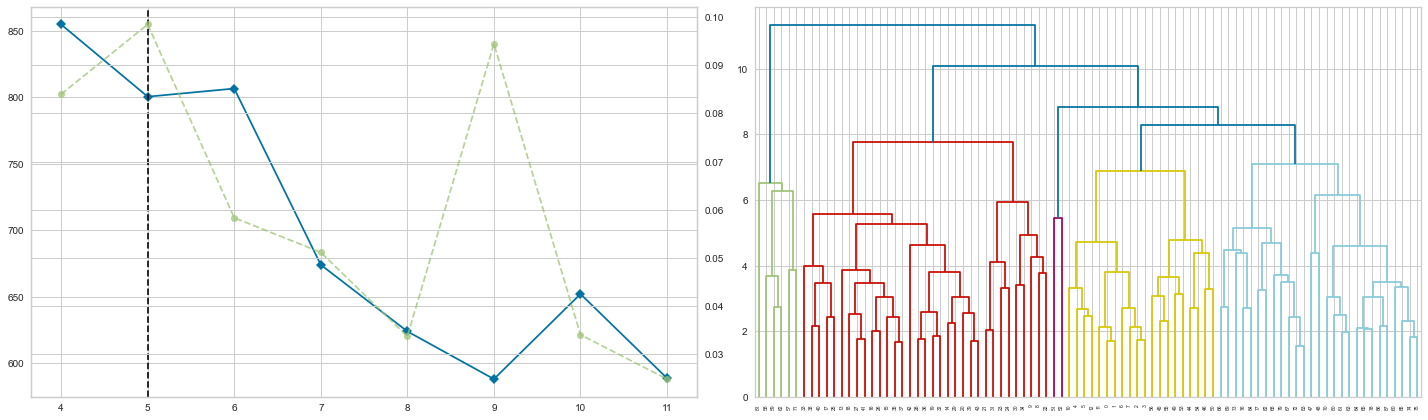

In [105]:
# Calling function to create elbow curve and dendrogram

elbow_curve_and_dendrogram(df3, 5, 5, 2)

In [106]:
# Calling function to create a dataframe of metric scores for six clustering algorithms

evaluation_matrix(df3, elbow_best_value, 2, 5, 3, 5, 2, 'discretize', 0.8, 500, 'euclidean')

,silhouette_score,davies_bouldin_score
MiniBatchKMeans,0.161849,1.682779
AgglomerativeClustering,0.336864,1.240892
DBSCAN,0.183107,2.096915
OPTICS,-0.104123,1.755814
Spectral Clustering,0.336864,1.240892
Affinity Propagation,0.148309,1.545647


In [107]:
# Calling function to create a dataframe of metric scores for GMM and Bayesian GMM

bayesian_and_gaussian(df3, 2, 'full', 1e-6)

,silhouette_score,davies_bouldin_score
Bayesian Gaussian Mixture,0.336864,1.240892
Gaussian Mixture,0.336864,1.240892


## Hyperparameter Selection

### Mini Batch KMeans

In [108]:
# Checking best combination of hyperparameters

best_combination = [[4,5],[5,10],[6,5],[7,15],[8,10]]

for i in best_combination:
    model = MiniBatchKMeans(n_clusters=i[0], random_state=0, batch_size=i[1])
    model.fit(df3)
    
    # Calculating intrinsic measures for each combination of hyperparameters
    
    silhouette = silhouette_score(df3, model.labels_, metric='euclidean')
    davies_bouldin = davies_bouldin_score(df3, model.labels_)
    
    # Evaluating means of respective scores for each combination
    
    scores = [silhouette + davies_bouldin]
    mean_scores = sum(scores)/len(scores)
    print('Average of all scores for ' + str(i) + ' combination is ' + str(mean_scores))

Average of all scores for [4, 5] combination is 1.8205059755376507
Average of all scores for [5, 10] combination is 1.963320052177492
Average of all scores for [6, 5] combination is 1.5850224275765061
Average of all scores for [7, 15] combination is 1.498444747125479
Average of all scores for [8, 10] combination is 1.6011110756531106


The best combination of hyperparameters in Mini Batch KMeans which gave the highest average metric score includes:

number of clusters = 5, batch size = 10 

### Agglomerative Clustering

In [109]:
# Checking best value of cluster

best_combination = [2,3,4,5,6,7,8]

for i in best_combination:
    model = AgglomerativeClustering(n_clusters=i)
    model.fit(df3)
    
    # Calculating intrinsic measures for each cluster value
    
    silhouette = silhouette_score(df3, model.labels_, metric='euclidean')
    davies_bouldin = davies_bouldin_score(df3, model.labels_)
    
    # Evaluating means of respective scores for each cluster
    
    scores = [silhouette + davies_bouldin]
    mean_scores = sum(scores)/len(scores)
    print('Average of all scores for ' + str(i) + ' clusters is ' + str(mean_scores))

Average of all scores for 2 clusters is 1.5777558078060652
Average of all scores for 3 clusters is 1.3899007845179665
Average of all scores for 4 clusters is 1.6374917756168723
Average of all scores for 5 clusters is 1.670768484741798
Average of all scores for 6 clusters is 1.8028449202969725
Average of all scores for 7 clusters is 1.71399048865226
Average of all scores for 8 clusters is 1.7530916426527872


The best value of number of clusters in Agglomerative Clustering is 6, which gave the highest average metric score.

### DBScan

In [127]:
# Checking best combination of hyperparameters

best_combination = [[2,3], [3,5], [5,7], [5,9], [3,7]]

for i in best_combination:
    model = DBSCAN(eps=i[0], min_samples=i[1])
    model.fit(df3)
    
    # Calculating intrinsic measures for each combination of hyperparameters
    
    silhouette = silhouette_score(df3, model.labels_, metric='euclidean')
    davies_bouldin = davies_bouldin_score(df3, model.labels_)
    
    # Evaluating means of respective scores for each combination
    
    scores = [silhouette + davies_bouldin]
    mean_scores = sum(scores)/len(scores)
    print('Average of all scores for ' + str(i) + ' combination is ' + str(mean_scores))

Average of all scores for [2, 3] combination is 1.4346636153296415
Average of all scores for [3, 5] combination is 2.2800225690442133
Average of all scores for [5, 7] combination is 1.8285981645339568
Average of all scores for [5, 9] combination is 1.8285981645339568
Average of all scores for [3, 7] combination is 2.253587059711376


The best combination of hyperparameters in DBScan which gave the highest average metric score includes:

maximum distance between two samples (eps) = 3, minimum number of samples = 5 

### OPTICS

In [128]:
# Checking best value of minimum number of samples

best_combination = [3,4,5,6,7,8]

for i in best_combination:
    model = OPTICS(min_samples=i)
    model.fit(df3)
    
    # Calculating extrinsic measures for each value of minimum samples
    
    silhouette = silhouette_score(df3, model.labels_, metric='euclidean')
    davies_bouldin = davies_bouldin_score(df3, model.labels_)
    
    # Evaluating means of respective scores for each value of minimum samples
    
    scores = [silhouette + davies_bouldin]
    mean_scores = sum(scores)/len(scores)
    print('Average of all scores for ' + str(i) + ' samples is ' + str(mean_scores))

Average of all scores for 3 samples is 1.4545284015711606
Average of all scores for 4 samples is 1.5477011052533796
Average of all scores for 5 samples is 1.6516909598118834
Average of all scores for 6 samples is 2.2765534596993815
Average of all scores for 7 samples is 2.2765534596993815
Average of all scores for 8 samples is 2.165627114005139


The best value of minimum number of samples in OPTICS could be either 6 or 7, which gave the highest average metric score.

### Affinity Propagation

In [130]:
# Checking best combination of hyperparameters

best_combination = [[0.5,200],[0.6,300],[0.7,200],[0.8,300],[0.8,500]]

for i in best_combination:
    model = AffinityPropagation(damping=i[0], max_iter=i[1], affinity="euclidean", random_state=0)
    model.fit(df3)
    
    # Calculating intrinsic measures for each combination of hyperparameters

    silhouette = silhouette_score(df3, model.labels_, metric='euclidean')
    davies_bouldin = davies_bouldin_score(df3, model.labels_)
    
    # Evaluating means of respective scores for each combination
    
    scores = [silhouette + davies_bouldin]
    mean_scores = sum(scores)/len(scores)
    print('Average of all scores for ' + str(i) + ' combination is ' + str(mean_scores))

Average of all scores for [0.5, 200] combination is 1.6939562217443849
Average of all scores for [0.6, 300] combination is 1.6628673290833131
Average of all scores for [0.7, 200] combination is 1.6939562217443849
Average of all scores for [0.8, 300] combination is 1.6939562217443849
Average of all scores for [0.8, 500] combination is 1.6939562217443849


The best combinations of hyperparameters in Affinity Propagation were four, all gave the highest average metric scores:

damping value, maximum iterations = (0.5,200), (0.7,200), (0.8,300) and (0.8,500)

We can choose any of these to obtain highest scores.

### Spectral Clustering

In [131]:
# Checking best combination of hyperparameters

best_combination = [[6,'discretize'],[7,'kmeans'],[8,'kmeans'],[5,'discretize'],[9,'discretize']]

for i in best_combination:
    model = SpectralClustering(n_clusters=i[0], assign_labels=i[1], random_state=0)
    model.fit(df3)
    
    # Calculating intrinsic measures for each combination of hyperparameters

    silhouette = silhouette_score(df3, model.labels_, metric='euclidean')
    davies_bouldin = davies_bouldin_score(df3, model.labels_)
    
    # Evaluating means of respective scores for each combination

    scores = [silhouette + davies_bouldin]
    mean_scores = sum(scores)/len(scores)
    print('Average of all scores for ' + str(i) + ' combination is ' + str(mean_scores))

Average of all scores for [6, 'discretize'] combination is 1.7373210608003395
Average of all scores for [7, 'kmeans'] combination is 1.9538380173515146
Average of all scores for [8, 'kmeans'] combination is 1.9637345742419412
Average of all scores for [5, 'discretize'] combination is 1.6758228111560036
Average of all scores for [9, 'discretize'] combination is 1.937574112554311


The best combination of hyperparameters in Spectral Clustering that gave the highest average metric score includes:

number of clusters = 8, assign labels = 'kmeans'

### Bayesian Gaussian Mixture

In [133]:
# Checking best combination of hyperparameters

best_combination = [[2,'full'],[3,'tied'],[4,'diag'],[5,'spherical'],[6,'full'],[7, 'spherical'],[8, 'diag']]

for i in best_combination:
    model = BayesianGaussianMixture(n_components=i[0], covariance_type=i[1], random_state=0)
    labels = model.fit(df3).fit_predict(df3)
    
    # Calculating intrinsic measures for each combination of hyperparameters

    silhouette = silhouette_score(df3, labels, metric='euclidean')
    davies_bouldin = davies_bouldin_score(df3, labels)
    
    # Evaluating means of respective scores for each combination

    scores = [silhouette + davies_bouldin]
    mean_scores = sum(scores)/len(scores)
    print('Average of all scores for ' + str(i) + ' combination is ' + str(mean_scores))

Average of all scores for [2, 'full'] combination is 1.5777558078060652
Average of all scores for [3, 'tied'] combination is 1.7035512594857152
Average of all scores for [4, 'diag'] combination is 1.5885545053543424
Average of all scores for [5, 'spherical'] combination is 1.498108990748508
Average of all scores for [6, 'full'] combination is 1.6421520408485746
Average of all scores for [7, 'spherical'] combination is 1.6628184796746923
Average of all scores for [8, 'diag'] combination is 1.44726146315196


The best combination of hyperparameters in Bayesian Gaussian Mixture that gave the highest average metric score includes:

number of components = 3, covariance type = 'tied'

### Gaussian Mixture Model

In [134]:
# Checking best combination of hyperparameters

best_combination = [[2,'full'],[3,'tied'],[4,'diag'],[5,'spherical'],[6,'full'],[7, 'spherical'],[8, 'diag']]

for i in best_combination:
    model = GaussianMixture(n_components=i[0], covariance_type=i[1], random_state=0)
    labels = model.fit(df3).fit_predict(df3)
    
    # Calculating extrinsic measures for each combination of hyperparameters

    silhouette = silhouette_score(df3, labels, metric='euclidean')
    davies_bouldin = davies_bouldin_score(df3, labels)
    
    # Evaluating means of respective scores for each combination

    scores = [silhouette + davies_bouldin]
    mean_scores = sum(scores)/len(scores)
    print('Average of all scores for ' + str(i) + ' combination is ' + str(mean_scores))

Average of all scores for [2, 'full'] combination is 1.5777558078060652
Average of all scores for [3, 'tied'] combination is 1.7035512594857152
Average of all scores for [4, 'diag'] combination is 1.6561950975345672
Average of all scores for [5, 'spherical'] combination is 1.8153826316254489
Average of all scores for [6, 'full'] combination is 1.6421520408485746
Average of all scores for [7, 'spherical'] combination is 1.6362348980196695
Average of all scores for [8, 'diag'] combination is 1.4936671056317752


The best combination of hyperparameters in Gaussian Mixture Model that gave the highest average metric score includes:

number of components = 5, covariance type = 'spherical'

#### Analysis:

1) It is observed that the Mini Batch KMeans outperforms GMM with highest average score, which shows that the Mini batch kmeans algorithm is better at accurately clustering and identifying patterns in the data. This could be due to the inherent structure of the data, the number of clusters, or the parameters used in the algorithms.

2) It is observed that the GMM outperforms Agglomerative Clustering with highest average score, it suggests that the GMM is able to more accurately and effectively cluster the data into distinct groups. This may be due to the fact that the GMM is able to account for the uncertainty in the data, whereas the Agglomerative clustering approach may be more rigid in its grouping of the data.

3) It is observed that the DBScan outperforms GMM with highest average score, which shows that DBScan is more accurately identifying clusters or has a lower error rate. This could be due to the nature of the data, the chosen distance metric, or the number of clusters being considered.

4) It is observed that the OPTICS outperforms GMM with highest average score, which shows that OPTICS is more effective at clustering the data and finding meaningful patterns within it. This could be due to the fact that OPTICS is able to handle more complex and non-linear data structures, whereas GMM are limited to more simple, linear patterns.

5) It is observed that the GMM outperforms Affinity Propagation with highest average score, which shows that the GMM is a better fit for the data and is able to more accurately predict or classify the data. This could be due to the GMM's ability to model data using a continuous distribution, as opposed to the discrete clustering method used by Affinity propagation.

6) It is observed that the Spectral Clustering outperforms GMM with highest average score, which shows that Spectral Clustering is better at identifying and separating distinct groups within the data set. This could be due to the fact that Spectral Clustering utilizes the graph structure of the data, which may be more effective at identifying and separating non-linearly distributed groups within the data.

7) It is observed that the GMM outperforms Bayesian GMM with slightly higher average score (very close), which shows that both models are performing similarly in terms of their ability to accurately predict or classify data. This may indicate that either model could be a suitable choice for the particular task at hand.

### Parameter changes:

#### (1) Based on number of components

In [135]:
# Changing number of components to obtain the best value

number_of_components = [2,3,4,5,6,7]

for i in number_of_components:
    model = GaussianMixture(n_components=i, covariance_type='full', reg_covar=1e-6, random_state=0)
    labels = model.fit(df3).fit_predict(df3)
    
    # Calculating intrinsic measures for each value of number of components
    
    silhouette = silhouette_score(df3, labels, metric='euclidean')
    davies_bouldin = davies_bouldin_score(df3, labels)
    
    # Evaluating means of respective scores for each value of number of components
    
    scores = [silhouette + davies_bouldin]
    mean_scores = sum(scores)/len(scores)
    print('Average of all scores for ' + str(i) + ' components is ' + str(mean_scores))

Average of all scores for 2 components is 1.5777558078060652
Average of all scores for 3 components is 1.7035512594857152
Average of all scores for 4 components is 1.5885545053543424
Average of all scores for 5 components is 1.7661531160189923
Average of all scores for 6 components is 1.6421520408485746
Average of all scores for 7 components is 1.6813990670281949


Upon increasing and decreasing the number of components parameter in GMM, it is observed that the best score is obtained when the number of components are 5. This suggests that the data may be best represented by a mixture of 5 different Gaussian distributions. This may indicate that the data has multiple underlying patterns or clusters, rather than a single homogenous group.

#### (2) Based on covariance type

In [136]:
# Changing covariance type to obtain the best value

type_of_covariance = ['full', 'tied', 'diag', 'spherical']

for i in type_of_covariance:
    model = GaussianMixture(n_components=2, covariance_type=i, reg_covar=1e-6, random_state=0)
    labels = model.fit(df3).fit_predict(df3)
    
    # Calculating intrinsic measures for each covariance type
    
    silhouette = silhouette_score(df3, labels, metric='euclidean')
    davies_bouldin = davies_bouldin_score(df3, labels)
    
    # Evaluating means of respective scores for each covariance type
    
    scores = [silhouette + davies_bouldin]
    mean_scores = sum(scores)/len(scores)
    print('Average of all scores for ' + str(i) + ' covariance type is ' + str(mean_scores))

Average of all scores for full covariance type is 1.5777558078060652
Average of all scores for tied covariance type is 1.5777558078060652
Average of all scores for diag covariance type is 1.5777558078060652
Average of all scores for spherical covariance type is 1.5777558078060652


Upon changing the type of covariance parameter in GMM, it is observed that all covariance types gave the same average metric score. It suggests that the choice of covariance type does not significantly impact the model's performance. This could be because the data does not contain enough complexity or variation to differentiate between the different covariance types, or because the model is not complex enough to take advantage of the different covariance types.

#### (3) Based on regularization of covariance

In [141]:
# Changing the value of regularized covariance to obtain the best value

regularization_covariance = [1e-6, 0.5, 1.5, 3]

for i in regularization_covariance:
    model = GaussianMixture(n_components=2, covariance_type='full', reg_covar=i, random_state=0)
    labels = model.fit(df3).fit_predict(df3)
    
    # Calculating intrinsic measures for each value of regularized covariance
    
    silhouette = silhouette_score(df3, labels, metric='euclidean')
    davies_bouldin = davies_bouldin_score(df3, labels)
    
    # Evaluating means of respective scores for each value of regularized covariance
    
    scores = [silhouette + davies_bouldin]
    mean_scores = sum(scores)/len(scores)
    print('Average of all scores for ' + 'regularized covariance of ' + str(i) + ' is ' + str(mean_scores))

Average of all scores for regularized covariance of 1e-06 is 1.5777558078060652
Average of all scores for regularized covariance of 0.5 is 1.5777558078060652
Average of all scores for regularized covariance of 1.5 is 1.5777558078060652
Average of all scores for regularized covariance of 3 is 1.5954661010326112


Upon increasing and decreasing the regularized covariance in GMM, it is observed that the best score is obtained when the value is 3. It indicates that the model is performing better with a regularization factor of 3 for the covariance matrix. This suggests that the model is able to better fit the data and make more accurate predictions when the regularization factor is set to 3. This may be due to the model being able to better handle overfitting or noise in the data with this regularization factor.

## Dataset 04: Water Treatment Plant

This dataset comes from the daily measures of sensors in a urban waste water treatment plant. The objective is to classify the operational state of the plant in order to predict faults through the state variables of the plant at each of the stages of the treatment process. This domain has been stated as an ill-structured domain. It contains 526 rows and 39 columns.

In [239]:
# Loading the dataset

df4 = pd.read_csv('Clustering\water-treatment.data', sep = ',')

# Assigning the column names

colnames = ['ID', 'Q-E', 'ZN-E', 'PH-E', 'DBO-E', 'DQO-E', 'SS-E', 'SSV-E', 'SED-E','COND-E', 'PH-P', 
            'DBO-P', 'SS-P', 'SSV-P', 'SED-P', 'COND-P', 'PH-D', 'DBO-D', 'DQO-D', 'SS-D', 'SSV-D', 
            'SED-D', 'COND-D', 'PH-S', 'DBO-S', 'DQO-S', 'SS-S', 'SSV-S', 'SED-S', 'COND-S', 
            'RD-DBO-P', 'RD-SS-P', 'RD-SED-P', 'RD-DBO-S', 'RD-DQO-S', 'RD-DBO-G', 'RD-DQO-G', 'RD-SS-G', 'RD-SED-G']
df4.columns = colnames

df4.head()

,ID,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
0,D-2/3/90,39024,3.00,7.7,?,443,214,69.2,6.5,2660,...,2590,?,60.7,94.8,?,80.8,?,79.5,92.1,100
1,D-4/3/90,32229,5.00,7.6,?,528,186,69.9,3.4,1666,...,1888,?,58.2,95.6,?,52.9,?,75.8,88.7,98.5
2,D-5/3/90,35023,3.50,7.9,205,588,192,65.6,4.5,2430,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
3,D-6/3/90,36924,1.50,8.0,242,496,176,64.8,4.0,2110,...,2120,?,62.7,95.6,?,71.0,92.1,78.2,87.5,99.5
4,D-7/3/90,38572,3.00,7.8,202,372,186,68.8,4.5,1644,...,1764,?,59.7,96.5,86.7,78.3,90.1,73.1,84.9,100


In [240]:
# Data shape

df4.shape

(526, 39)

In [241]:
# Converting string columns to float

df4['Q-E'] = pd.to_numeric(df4['Q-E'], errors='coerce').astype('float64')
df4['ZN-E'] = pd.to_numeric(df4['ZN-E'], errors='coerce').astype('float64')
df4['DBO-E'] = pd.to_numeric(df4['DBO-E'], errors='coerce').astype('float64')
df4['DQO-E'] = pd.to_numeric(df4['DQO-E'], errors='coerce').astype('float64')
df4['SS-E'] = pd.to_numeric(df4['SS-E'], errors='coerce').astype('float64')
df4['SSV-E'] = pd.to_numeric(df4['SSV-E'], errors='coerce').astype('float64')
df4['SED-E'] = pd.to_numeric(df4['SED-E'], errors='coerce').astype('float64')
df4['DBO-P'] = pd.to_numeric(df4['DBO-P'], errors='coerce').astype('float64')
df4['SSV-P'] = pd.to_numeric(df4['SSV-P'], errors='coerce').astype('float64')
df4['SED-P'] = pd.to_numeric(df4['SED-P'], errors='coerce').astype('float64')
df4['DBO-D'] = pd.to_numeric(df4['DBO-D'], errors='coerce').astype('float64')
df4['DQO-D'] = pd.to_numeric(df4['DQO-D'], errors='coerce').astype('float64')
df4['SS-D'] = pd.to_numeric(df4['SS-D'], errors='coerce').astype('float64')
df4['SSV-D'] = pd.to_numeric(df4['SSV-D'], errors='coerce').astype('float64')
df4['SED-D'] = pd.to_numeric(df4['SED-D'], errors='coerce').astype('float64')
df4['PH-S'] = pd.to_numeric(df4['PH-S'], errors='coerce').astype('float64')
df4['DBO-S'] = pd.to_numeric(df4['DBO-S'], errors='coerce').astype('float64')
df4['DQO-S'] = pd.to_numeric(df4['DQO-S'], errors='coerce').astype('float64')
df4['SS-S'] = pd.to_numeric(df4['SS-S'], errors='coerce').astype('float64')
df4['SSV-S'] = pd.to_numeric(df4['SSV-S'], errors='coerce').astype('float64')
df4['SED-S'] = pd.to_numeric(df4['SED-S'], errors='coerce').astype('float64')
df4['COND-S'] = pd.to_numeric(df4['COND-S'], errors='coerce').astype('float64')
df4['RD-DBO-P'] = pd.to_numeric(df4['RD-DBO-P'], errors='coerce').astype('float64')
df4['RD-SS-P'] = pd.to_numeric(df4['RD-SS-P'], errors='coerce').astype('float64')
df4['RD-SED-P'] = pd.to_numeric(df4['RD-SED-P'], errors='coerce').astype('float64')
df4['RD-DBO-S'] = pd.to_numeric(df4['RD-DBO-S'], errors='coerce').astype('float64')
df4['RD-DQO-S'] = pd.to_numeric(df4['RD-DQO-S'], errors='coerce').astype('float64')
df4['RD-DBO-G'] = pd.to_numeric(df4['RD-DBO-G'], errors='coerce').astype('float64')
df4['RD-DQO-G'] = pd.to_numeric(df4['RD-DQO-G'], errors='coerce').astype('float64')
df4['RD-SS-G'] = pd.to_numeric(df4['RD-SS-G'], errors='coerce').astype('float64')
df4['RD-SED-G'] = pd.to_numeric(df4['RD-SED-G'], errors='coerce').astype('float64')

In [242]:
# Checking null values

df4.isna().sum()

ID           0
Q-E         18
ZN-E         3
PH-E         0
DBO-E       22
DQO-E        6
SS-E         1
SSV-E       11
SED-E       25
COND-E       0
PH-P         0
DBO-P       39
SS-P         0
SSV-P       11
SED-P       24
COND-P       0
PH-D         0
DBO-D       27
DQO-D        9
SS-D         2
SSV-D       13
SED-D       25
COND-D       0
PH-S         1
DBO-S       22
DQO-S       18
SS-S         5
SSV-S       17
SED-S       28
COND-S       1
RD-DBO-P    61
RD-SS-P      4
RD-SED-P    27
RD-DBO-S    39
RD-DQO-S    26
RD-DBO-G    35
RD-DQO-G    25
RD-SS-G      8
RD-SED-G    31
dtype: int64

In [243]:
# Converting string columns to integer

for i in df4.select_dtypes(include=[object]).columns:
    df4[i] = pd.factorize(df4[i])[0] + 1

In [244]:
# Filling null values with the mean of respective columns

for i in df4.columns:
    df4[i].fillna(df4[i].mean(), inplace=True)

In [245]:
# Checking null values

df4.isna().sum().sum()

0

In [246]:
# Normalizing the data

ss=StandardScaler()
for i in df4.columns:
    df4[i] = ss.fit_transform(df4[[i]])

For MiniBatchKMeans, the ideal number of clusters are  4
Based on dendrogram, the ideal number of clusters are  2


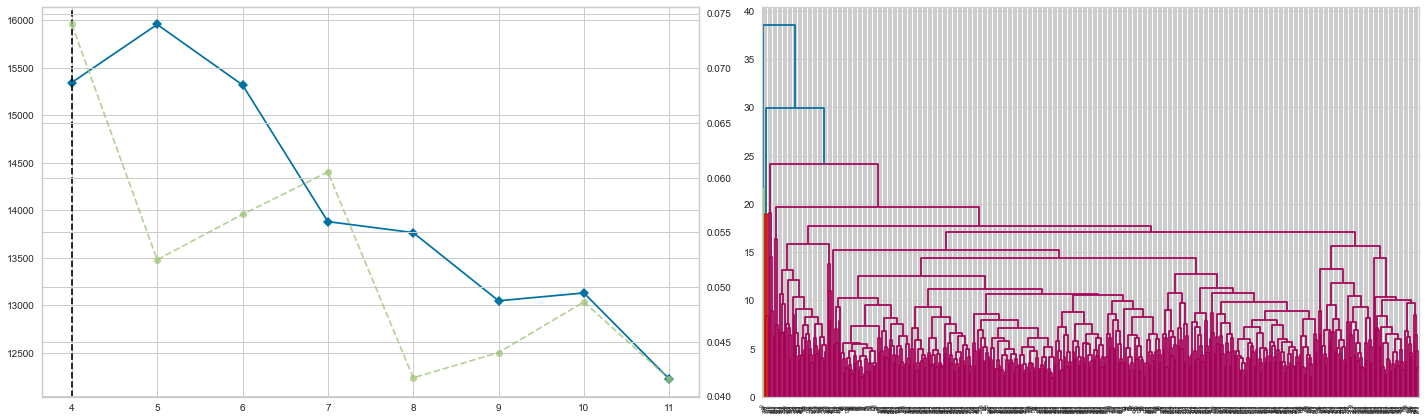

In [189]:
# Calling function to create elbow curve and dendrogram

elbow_curve_and_dendrogram(df4, 4, 50, 2)

In [190]:
# Calling function to create a dataframe of metric scores for six clustering algorithms

evaluation_matrix(df4, elbow_best_value, 2, 50, 3, 5, 2, 'discretize', 0.8, 500, 'euclidean')

,silhouette_score,davies_bouldin_score
MiniBatchKMeans,0.120028,1.841347
AgglomerativeClustering,0.636259,1.060621
DBSCAN,-0.255184,2.679827
OPTICS,-0.186179,2.783452
Spectral Clustering,0.560279,1.544098
Affinity Propagation,0.048801,1.491415


In [191]:
# Calling function to create a dataframe of metric scores for GMM and Bayesian GMM

bayesian_and_gaussian(df4, 2, 'full', 1e-6)

,silhouette_score,davies_bouldin_score
Bayesian Gaussian Mixture,0.230765,3.601767
Gaussian Mixture,0.225568,3.509052


## Hyperparameter Selection

### Mini Batch KMeans

In [192]:
# Checking best combination of hyperparameters

best_combination = [[4,50],[5,100],[6,25],[7,50],[8,100]]

for i in best_combination:
    model = MiniBatchKMeans(n_clusters=i[0], random_state=0, batch_size=i[1])
    model.fit(df4)
    
    # Calculating intrinsic measures for each combination of hyperparameters

    silhouette = silhouette_score(df4, model.labels_, metric='euclidean')
    davies_bouldin = davies_bouldin_score(df4, model.labels_)
    
    # Evaluating means of respective scores for each combination
    
    scores = [silhouette + davies_bouldin]
    mean_scores = sum(scores)/len(scores)
    print('Average of all scores for ' + str(i) + ' combination is ' + str(mean_scores))

Average of all scores for [4, 50] combination is 1.9613751870694065
Average of all scores for [5, 100] combination is 2.535944271457057
Average of all scores for [6, 25] combination is 2.2294675116555194
Average of all scores for [7, 50] combination is 2.180840819612643
Average of all scores for [8, 100] combination is 2.163093431732093


The best combination of hyperparameters in Mini Batch KMeans which gave the highest average metric score includes:

number of clusters = 5, batch size = 100

### Agglomerative Clustering

In [193]:
# Checking best value of cluster

best_combination = [2,3,4,5,6,7,8]

for i in best_combination:
    model = AgglomerativeClustering(n_clusters=i)
    model.fit(df4)
    
    # Calculating intrinsic measures for each cluster value
    
    silhouette = silhouette_score(df4, model.labels_, metric='euclidean')
    davies_bouldin = davies_bouldin_score(df4, model.labels_)
    
    # Evaluating means of respective scores for each cluster
    
    scores = [silhouette + davies_bouldin]
    mean_scores = sum(scores)/len(scores)
    print('Average of all scores for ' + str(i) + ' clusters is ' + str(mean_scores))

Average of all scores for 2 clusters is 1.6968798596266215
Average of all scores for 3 clusters is 2.075535068616239
Average of all scores for 4 clusters is 1.914202465723809
Average of all scores for 5 clusters is 2.39651084405617
Average of all scores for 6 clusters is 2.2696252134861834
Average of all scores for 7 clusters is 2.0323259608927113
Average of all scores for 8 clusters is 2.0438943564422045


The best value of number of clusters in Agglomerative Clustering is 5, which gave the highest average metric score.

### DBScan

In [205]:
# Checking best combination of hyperparameters

best_combination = [[3,5], [3,7], [5,7], [5,9], [7,9]]

for i in best_combination:
    model = DBSCAN(eps=i[0], min_samples=i[1])
    model.fit(df4)
    
    # Calculating intrinsic measures for each combination of hyperparameters

    silhouette = silhouette_score(df4, model.labels_, metric='euclidean')
    davies_bouldin = davies_bouldin_score(df4, model.labels_)
    
    # Evaluating means of respective scores for each combination

    scores = [silhouette + davies_bouldin]
    mean_scores = sum(scores)/len(scores)
    print('Average of all scores for ' + str(i) + ' combination is ' + str(mean_scores))

Average of all scores for [3, 5] combination is 2.4246430499278295
Average of all scores for [3, 7] combination is 2.5313347247125018
Average of all scores for [5, 7] combination is 4.2571640249579525
Average of all scores for [5, 9] combination is 4.3046244480886395
Average of all scores for [7, 9] combination is 3.226248737886689


The best combination of hyperparameters in DBScan which gave the highest average metric score includes:

maximum distance between two samples (eps) = 5, minimum number of samples = 9 

### OPTICS

In [206]:
# Checking best value of minimum number of samples

best_combination = [3,4,5,6,7,8]

for i in best_combination:
    model = OPTICS(min_samples=i)
    model.fit(df4)
    
    # Calculating intrinsic measures for each value of minimum samples
    
    silhouette = silhouette_score(df4, model.labels_, metric='euclidean')
    davies_bouldin = davies_bouldin_score(df4, model.labels_)
    
    # Evaluating means of respective scores for each value of minimum samples
    
    scores = [silhouette + davies_bouldin]
    mean_scores = sum(scores)/len(scores)
    print('Average of all scores for ' + str(i) + ' samples is ' + str(mean_scores))

Average of all scores for 3 samples is 1.5407441828794526
Average of all scores for 4 samples is 1.9945909102328288
Average of all scores for 5 samples is 2.5972724681301456
Average of all scores for 6 samples is 2.4884556964799303
Average of all scores for 7 samples is 3.4615941607934295
Average of all scores for 8 samples is 3.4615941607934295


The best value of minimum number of samples in OPTICS could be either 7 or 8, which gave the highest average metric score.

### Affinity Propagation

In [208]:
# Checking best combination of hyperparameters

best_combination = [[0.5,200],[0.6,300],[0.7,400],[0.8,200],[0.9,500]]

for i in best_combination:
    model = AffinityPropagation(damping=i[0], max_iter=i[1], affinity="euclidean", random_state=0)
    model.fit(df4)
    
    # Calculating intrinsic measures for each combination of hyperparameters

    silhouette = silhouette_score(df4, model.labels_, metric='euclidean')
    davies_bouldin = davies_bouldin_score(df4, model.labels_)
    
    # Evaluating means of respective scores for each combination
    
    scores = [silhouette + davies_bouldin]
    mean_scores = sum(scores)/len(scores)
    print('Average of all scores for ' + str(i) + ' combination is ' + str(mean_scores))

Average of all scores for [0.5, 200] combination is 1.5402165853347742
Average of all scores for [0.6, 300] combination is 1.5402165853347742
Average of all scores for [0.7, 400] combination is 1.5402165853347742
Average of all scores for [0.8, 200] combination is 1.5402165853347742
Average of all scores for [0.9, 500] combination is 1.5829965661764815


The best combination of hyperparameters in Affinity Propagation which gave the highest average metric scores include:

damping value = 0.9, maximum iterations = 500

### Spectral Clustering

In [209]:
# Checking best combination of hyperparameters

best_combination = [[6,'discretize'],[7,'kmeans'],[8,'kmeans'],[5,'discretize'],[9,'discretize']]

for i in best_combination:
    model = SpectralClustering(n_clusters=i[0], assign_labels=i[1], random_state=0)
    model.fit(df4)
    
    # Calculating intrinsic measures for each combination of hyperparameters
    
    silhouette = silhouette_score(df4, model.labels_, metric='euclidean')
    davies_bouldin = davies_bouldin_score(df4, model.labels_)
    
    # Evaluating means of respective scores for each combination

    scores = [silhouette + davies_bouldin]
    mean_scores = sum(scores)/len(scores)
    print('Average of all scores for ' + str(i) + ' combination is ' + str(mean_scores))

Average of all scores for [6, 'discretize'] combination is 2.50148925260486
Average of all scores for [7, 'kmeans'] combination is 0.9192221406947623
Average of all scores for [8, 'kmeans'] combination is 0.9192221406947623
Average of all scores for [5, 'discretize'] combination is 2.6223732288727244
Average of all scores for [9, 'discretize'] combination is 2.256817442995003


The best combination of hyperparameters in Spectral Clustering that gave the highest average metric score includes:

number of clusters = 5, assign labels = 'discretize'

### Bayesian Gaussian Mixture

In [210]:
# Checking best combination of hyperparameters

best_combination = [[2,'full'],[3,'tied'],[4,'diag'],[5,'spherical'],[6,'full'],[7, 'spherical'],[8, 'diag']]

for i in best_combination:
    model = BayesianGaussianMixture(n_components=i[0], covariance_type=i[1], random_state=0)
    labels = model.fit(df4).fit_predict(df4)
    
    # Calculating intrinsic measures for each combination of hyperparameters
    
    silhouette = silhouette_score(df4, labels, metric='euclidean')
    davies_bouldin = davies_bouldin_score(df4, labels)
    
    # Evaluating means of respective scores for each combination
    
    scores = [silhouette + davies_bouldin]
    mean_scores = sum(scores)/len(scores)
    print('Average of all scores for ' + str(i) + ' combination is ' + str(mean_scores))

Average of all scores for [2, 'full'] combination is 3.8325319379414378
Average of all scores for [3, 'tied'] combination is 2.458125597463879
Average of all scores for [4, 'diag'] combination is 2.2279612173338283
Average of all scores for [5, 'spherical'] combination is 4.750465319206147
Average of all scores for [6, 'full'] combination is 2.187431537409759
Average of all scores for [7, 'spherical'] combination is 3.923534775487343
Average of all scores for [8, 'diag'] combination is 2.0352043181872967


The best combination of hyperparameters in Bayesian Gaussian Mixture that gave the highest average metric score includes:

number of components = 5, covariance type = 'spherical'

### Gaussian Mixture Model

In [211]:
# Checking best combination of hyperparameters

best_combination = [[2,'full'],[3,'tied'],[4,'diag'],[5,'spherical'],[6,'full'],[7, 'spherical'],[8, 'diag']]

for i in best_combination:
    model = GaussianMixture(n_components=i[0], covariance_type=i[1], random_state=0)
    labels = model.fit(df4).fit_predict(df4)
    
    # Calculating intrinsic measures for each combination of hyperparameters

    silhouette = silhouette_score(df4, labels, metric='euclidean')
    davies_bouldin = davies_bouldin_score(df4, labels)
    
    # Evaluating means of respective scores for each combination
    
    scores = [silhouette + davies_bouldin]
    mean_scores = sum(scores)/len(scores)
    print('Average of all scores for ' + str(i) + ' combination is ' + str(mean_scores))

Average of all scores for [2, 'full'] combination is 3.73461986914379
Average of all scores for [3, 'tied'] combination is 2.414444958552329
Average of all scores for [4, 'diag'] combination is 2.5355218086659668
Average of all scores for [5, 'spherical'] combination is 2.6414560650787253
Average of all scores for [6, 'full'] combination is 2.2094656458897797
Average of all scores for [7, 'spherical'] combination is 2.094349242342218
Average of all scores for [8, 'diag'] combination is 2.2734923126161184


The best combination of hyperparameters in Gaussian Mixture Model that gave the highest average metric score includes:

number of components = 2, covariance type = 'full'

#### Analysis:

1) It is observed that the GMM outperforms Mini Batch KMeans with highest average score, which shows that the GMM is better at modeling the data according to the chosen performance metrics. This could be because the GMM is more flexible and able to capture more complex patterns in the data.

2) It is observed that the GMM outperforms Agglomerative Clustering with highest average score, it suggests that the GMM is able to more accurately and effectively cluster the data into distinct groups. This may be due to the fact that the GMM is able to account for the uncertainty in the data, whereas the Agglomerative clustering approach may be more rigid in its grouping of the data.

3) It is observed that the DBScan outperforms GMM with highest average score, which shows that DBScan is more accurately identifying clusters or has a lower error rate. This could be due to the nature of the data, the chosen distance metric, or the number of clusters being considered.

4) It is observed that the GMM outperforms OPTICS with highest average score, which shows that GMM is more effective at accurately clustering the data. This could be due to the GMM's ability to handle multimodal data and its flexibility in modeling the underlying distribution of the data.

5) It is observed that the GMM outperforms Affinity Propagation with highest average score, which shows that the GMM is a better fit for the data and is able to more accurately predict or classify the data. This could be due to the GMM's ability to model data using a continuous distribution, as opposed to the discrete clustering method used by Affinity propagation.

6) It is observed that the GMM outperforms Spectral Clustering with highest average score, which shows that the GMM is a better fit for the given data and produces more accurate or effective clustering results. This may be due to the GMM's ability to handle mixed data types and account for uncertainty in the data, or because it is more robust to noise or outliers in the data.

7) It is observed that the Bayesian GMM outperforms GMM with highest average score, which shows that the Bayesian version may be slightly more effective in accurately identifying patterns and classifying data points within the dataset. This could be due to the Bayesian model's ability to incorporate prior knowledge and incorporate uncertainties in its predictions, which may lead to more accurate and robust results.

### Parameter changes:

#### (1) Based on number of components

In [247]:
# Changing number of components to obtain the best value

number_of_components = [2,3,4,5,6,7]

mean_score_list = []

for i in number_of_components:
    model = GaussianMixture(n_components=i, covariance_type='full', reg_covar=1e-6, random_state=0)
    labels = model.fit(df4).fit_predict(df4)
    
    # Calculating intrinsic measures for each value of number of components
    
    silhouette = silhouette_score(df4, labels, metric='euclidean')
    davies_bouldin = davies_bouldin_score(df4, labels)
    
    # Evaluating means of respective scores for each value of number of components
    
    scores = [silhouette + davies_bouldin]
    mean_scores = sum(scores)/len(scores)
    print('Average of all scores for ' + str(i) + ' components is ' + str(mean_scores))
    mean_score_list.append(mean_scores)

Average of all scores for 2 components is 3.73461986914379
Average of all scores for 3 components is 2.5745349900206262
Average of all scores for 4 components is 2.693569517208639
Average of all scores for 5 components is 2.6596199242713445
Average of all scores for 6 components is 2.2094656458897797
Average of all scores for 7 components is 2.0587717234024177


Upon increasing and decreasing the number of components parameter in GMM, it is observed that the best score is obtained when the number of components are 2. This shows that the model is able to accurately classify the data using fewer components or clusters. This may indicate that the  model is able to effectively capture the underlying structure of the data using fewer components.

#### Plotting n_component parameter's performance

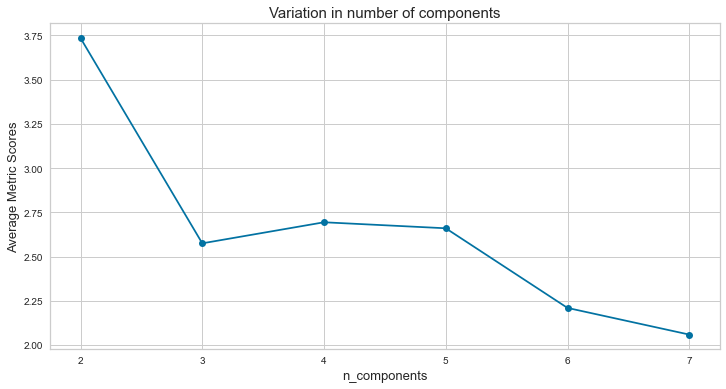

In [248]:
list_of_components = [number_of_components[0], number_of_components[1], number_of_components[2], number_of_components[3], 
                      number_of_components[4], number_of_components[5]]
plt.figure(figsize = (12,6))
plt.plot(mean_score_list, marker = 'o', label = [list_of_components])
plt.xlabel('n_components', fontsize=13)
plt.ylabel('Average Metric Scores', fontsize=13)
plt.title('Variation in number of components', fontsize=15)
plt.xticks([0,1,2,3,4,5], list_of_components)
plt.show()

#### (2) Based on covariance type

In [249]:
# Changing covariance type to obtain the best value

type_of_covariance = ['full', 'tied', 'diag', 'spherical']

mean_score_list = []

for i in type_of_covariance:
    model = GaussianMixture(n_components=2, covariance_type=i, reg_covar=1e-6, random_state=0)
    labels = model.fit(df4).fit_predict(df4)
    
    # Calculating intrinsic measures for each covariance type
    
    silhouette = silhouette_score(df4, labels, metric='euclidean')
    davies_bouldin = davies_bouldin_score(df4, labels)
    
    # Evaluating means of respective scores for each covariance type
    
    scores = [silhouette + davies_bouldin]
    mean_scores = sum(scores)/len(scores)
    print('Average of all scores for ' + str(i) + ' covariance type is ' + str(mean_scores))
    mean_score_list.append(mean_scores)

Average of all scores for full covariance type is 3.73461986914379
Average of all scores for tied covariance type is 3.127378923750184
Average of all scores for diag covariance type is 3.8774853499936066
Average of all scores for spherical covariance type is 4.704530695116908


Upon changing the type of covariance parameter in GMM, it is observed that the best score is obtained when the covariance type is 'spherical'. It suggests that the data is more effectively modeled by clusters that have a spherical shape rather than an elongated or more complex shape. This may indicate that the data points are more uniformly distributed within the clusters and are less spread out or have less overlap with other clusters.

#### Plotting covariance_type parameter's performance

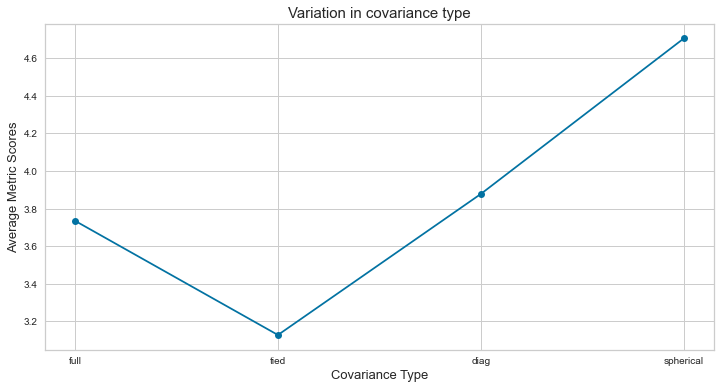

In [250]:
list_of_covariance_types = [type_of_covariance[0], type_of_covariance[1], type_of_covariance[2], type_of_covariance[3]]
plt.figure(figsize = (12,6))
plt.plot(mean_score_list, marker = 'o', label = [list_of_covariance_types])
plt.xlabel('Covariance Type', fontsize=13)
plt.ylabel('Average Metric Scores', fontsize=13)
plt.title('Variation in covariance type', fontsize=15)
plt.xticks([0,1,2,3], list_of_covariance_types)
plt.show()

#### (3) Based on regularization of covariance

In [251]:
# Changing the value of regularized covariance to obtain the best value

regularization_covariance = [1e-6, 0.5, 1.5, 3, 5]

mean_score_list = []

for i in regularization_covariance:
    model = GaussianMixture(n_components=2, covariance_type='full', reg_covar=i, random_state=0)
    labels = model.fit(df4).fit_predict(df4)
    
    # Calculating intrinsic measures for each value of regularized covariance
    
    silhouette = silhouette_score(df4, labels, metric='euclidean')
    davies_bouldin = davies_bouldin_score(df4, labels)
    
    # Evaluating means of respective scores for each value of regularized covariance
    
    scores = [silhouette + davies_bouldin]
    mean_scores = sum(scores)/len(scores)
    print('Average of all scores for ' + 'regularized covariance of ' + str(i) + ' is ' + str(mean_scores))
    mean_score_list.append(mean_scores)

Average of all scores for regularized covariance of 1e-06 is 3.73461986914379
Average of all scores for regularized covariance of 0.5 is 3.3669890504478284
Average of all scores for regularized covariance of 1.5 is 3.0444456125565282
Average of all scores for regularized covariance of 3 is 2.837483134550863
Average of all scores for regularized covariance of 5 is 2.3148344977591013


Upon increasing and decreasing the regularized covariance in GMM, it is observed that the best score is obtained when the value is 1e-6. This suggests that the model is performing better when the regularization of the covariance matrices is set to a small value. This could indicate that the model is able to better fit the data when the regularization is set to a lower value, possibly because it is able to more accurately capture the underlying relationships in the data.

#### Plotting reg_covar parameter's performance

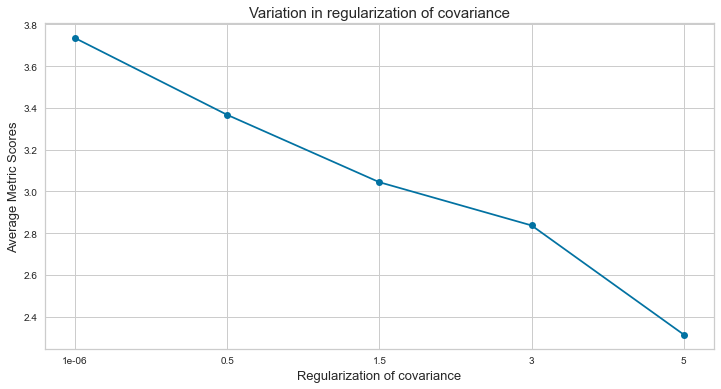

In [252]:
list_of_reg_covar = [regularization_covariance[0], regularization_covariance[1], regularization_covariance[2], 
                     regularization_covariance[3], regularization_covariance[4]]
plt.figure(figsize = (12,6))
plt.plot(mean_score_list, marker = 'o', label = [list_of_reg_covar])
plt.xlabel('Regularization of covariance', fontsize=13)
plt.ylabel('Average Metric Scores', fontsize=13)
plt.title('Variation in regularization of covariance', fontsize=15)
plt.xticks([0,1,2,3,4], list_of_reg_covar)
plt.show()